# Task 6.5 Machine Learning

### This script contains the following:

####  Import libraries
####  Import Data and drop values not needed
####  Covert Categorie columns
####  The elbow technique
####  k-means clustering

In [10]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [11]:
%matplotlib inline

In [12]:
# Import Data frame

path = r"C:\Users\thoms\Desktop\Data Analytics\Achievement 6\Rental Car\02. Data"

In [13]:
df = pd.read_csv(os.path.join(path,'Prepared Data','CarRentalDataV1.csv'))

In [14]:
df.shape

(5776, 18)

In [15]:
df.head()

,Unnamed: 0,fuel.type,rating,renter.trips.taken,review.count,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airport.city,rate category
0,0,ELECTRIC,5.00,13.0,12.0,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,Albuquerque,High rate
1,1,ELECTRIC,5.00,2.0,1.0,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,Albuquerque,High rate
2,2,HYBRID,4.92,28.0,24.0,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,Albuquerque,High rate
3,3,GASOLINE,5.00,21.0,20.0,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,Albuquerque,average rate
4,4,GASOLINE,5.00,3.0,1.0,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,Albuquerque,average rate


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5776 entries, 0 to 5775
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5776 non-null   int64  
 1   fuel.type           5776 non-null   object 
 2   rating              5776 non-null   float64
 3   renter.trips.taken  5776 non-null   float64
 4   review.count        5776 non-null   float64
 5   location.city       5776 non-null   object 
 6   location.country    5776 non-null   object 
 7   location.latitude   5776 non-null   float64
 8   location.longitude  5776 non-null   float64
 9   location.state      5776 non-null   object 
 10  owner.id            5776 non-null   int64  
 11  rate.daily          5776 non-null   int64  
 12  vehicle.make        5776 non-null   object 
 13  vehicle.model       5776 non-null   object 
 14  vehicle.type        5776 non-null   object 
 15  vehicle.year        5776 non-null   int64  
 16  airpor

In [17]:
df.drop(columns=['Unnamed: 0','location.city', 'location.country', 'location.state','vehicle.model', 'vehicle.make','vehicle.model','vehicle.type', 'airport.city','rate category'])

,fuel.type,rating,renter.trips.taken,review.count,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
0,ELECTRIC,5.000000,13.0,12.000000,47.449107,-122.308841,12847615,135,2019
1,ELECTRIC,5.000000,2.0,1.000000,35.111060,-106.276551,15621242,190,2018
2,HYBRID,4.920000,28.0,24.000000,35.127163,-106.566681,10199256,35,2012
3,GASOLINE,5.000000,21.0,20.000000,35.149726,-106.711425,9365496,75,2018
4,GASOLINE,5.000000,3.0,1.000000,35.208659,-106.601008,3553565,47,2010
...,...,...,...,...,...,...,...,...,...
5771,GASOLINE,5.000000,32.0,27.000000,21.292950,-157.836856,9794111,33,2017
5772,HYBRID,5.000000,17.0,16.000000,21.375507,-157.914919,2754690,49,2010
5773,GASOLINE,4.940000,18.0,17.000000,21.378719,-157.727816,11313508,35,2013
5774,GASOLINE,4.920325,1.0,28.454794,21.376105,-158.020237,4209883,77,2015


In [18]:
# drop zeros as this will not effect the data set

df.dropna(inplace = True)

In [19]:
#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

In [20]:
#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [21]:
#view updated DataFrame
df

,Unnamed: 0,fuel.type,rating,renter.trips.taken,review.count,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airport.city,rate category
0,0,0,5.000000,13.0,12.000000,0,0,47.449107,-122.308841,0,12847615,135,0,0,0,2019,0,0
1,1,0,5.000000,2.0,1.000000,1,0,35.111060,-106.276551,1,15621242,190,0,0,0,2018,0,0
2,2,1,4.920000,28.0,24.000000,2,0,35.127163,-106.566681,1,10199256,35,1,1,1,2012,0,0
3,3,2,5.000000,21.0,20.000000,2,0,35.149726,-106.711425,1,9365496,75,2,2,1,2018,0,1
4,4,2,5.000000,3.0,1.000000,2,0,35.208659,-106.601008,1,3553565,47,3,3,1,2010,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,5846,2,5.000000,32.0,27.000000,911,0,21.292950,-157.836856,45,9794111,33,14,97,1,2017,101,0
5772,5847,1,5.000000,17.0,16.000000,915,0,21.375507,-157.914919,45,2754690,49,15,107,1,2010,101,1
5773,5848,2,4.940000,18.0,17.000000,918,0,21.378719,-157.727816,45,11313508,35,17,32,1,2013,101,0
5774,5849,2,4.920325,1.0,28.454794,914,0,21.376105,-158.020237,45,4209883,77,5,373,4,2015,101,1


In [22]:
df.drop(columns=['Unnamed: 0','location.city', 'location.country', 'location.state','vehicle.model', 'vehicle.make','vehicle.model','vehicle.type', 'airport.city','rate category'])

,fuel.type,rating,renter.trips.taken,review.count,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
0,0,5.000000,13.0,12.000000,47.449107,-122.308841,12847615,135,2019
1,0,5.000000,2.0,1.000000,35.111060,-106.276551,15621242,190,2018
2,1,4.920000,28.0,24.000000,35.127163,-106.566681,10199256,35,2012
3,2,5.000000,21.0,20.000000,35.149726,-106.711425,9365496,75,2018
4,2,5.000000,3.0,1.000000,35.208659,-106.601008,3553565,47,2010
...,...,...,...,...,...,...,...,...,...
5771,2,5.000000,32.0,27.000000,21.292950,-157.836856,9794111,33,2017
5772,1,5.000000,17.0,16.000000,21.375507,-157.914919,2754690,49,2010
5773,2,4.940000,18.0,17.000000,21.378719,-157.727816,11313508,35,2013
5774,2,4.920325,1.0,28.454794,21.376105,-158.020237,4209883,77,2015


In [23]:
df.shape

(5407, 18)

In [24]:
# Elbow Technique


num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [25]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.1702791157682667e+17,
 -2.7675900284648284e+16,
 -1.3279869144120974e+16,
 -6318199940699366.0,
 -3858529884593631.5,
 -2550770342748070.5,
 -1843886509017899.5,
 -1420284493994080.8,
 -1165156540575286.5]

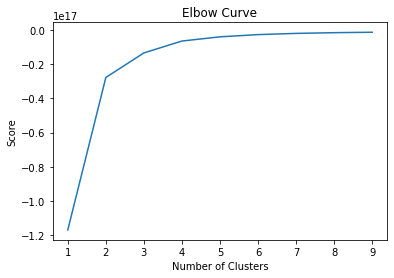

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a big jump from 2 to 3 and even to 4 but I have decided to go with the middle at 3.

In [27]:
# k-means clustering

# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [28]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [29]:
df['clusters'] = kmeans.fit_predict(df)

In [30]:
df.head()

,Unnamed: 0,fuel.type,rating,renter.trips.taken,review.count,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airport.city,rate category,clusters
0,0,0,5.00,13.0,12.0,0,0,47.449107,-122.308841,0,12847615,135,0,0,0,2019,0,0,0
1,1,0,5.00,2.0,1.0,1,0,35.111060,-106.276551,1,15621242,190,0,0,0,2018,0,0,0
2,2,1,4.92,28.0,24.0,2,0,35.127163,-106.566681,1,10199256,35,1,1,1,2012,0,0,2
3,3,2,5.00,21.0,20.0,2,0,35.149726,-106.711425,1,9365496,75,2,2,1,2018,0,1,2
4,4,2,5.00,3.0,1.0,2,0,35.208659,-106.601008,1,3553565,47,3,3,1,2010,0,1,1


In [31]:
df['clusters'].value_counts()

1    2723
2    1691
0     993
Name: clusters, dtype: int64

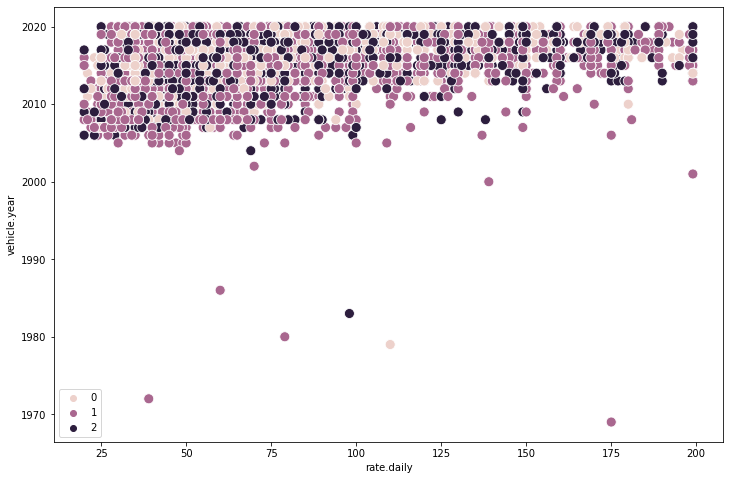

In [32]:
# Plot the clusters for the "Vehicle Year" and "Daily Rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rate.daily'], y=df['vehicle.year'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('rate.daily') # Label x-axis.
plt.ylabel('vehicle.year') # Label y-axis.
plt.show()

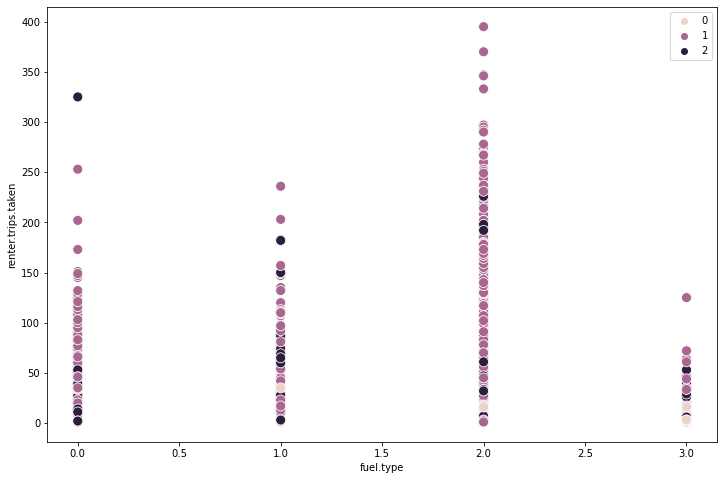

In [33]:
# Plot the clusters for the "rating" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['fuel.type'], y=df['renter.trips.taken'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('fuel.type') 
plt.ylabel('renter.trips.taken') 
plt.show()

#### With the first cluster you can see the daily rate goes upwards and only more and more towards the new vehicles. The older the vehicle the cheaper the rental rate, however there are a few outliers 


#### The second cluster shows the that the majority of rentals taken are gasoline, I have included an index below for understanding the 0 ,1 , 2, 3. 

#### 0 - Diesel
#### 1 - Electric
#### 2 - Gasoline 
#### 3 - Hybrid 

In [34]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [35]:
df.groupby('cluster').agg({'renter.trips.taken':['mean', 'median'], 
                         'rate.daily':['mean', 'median'], 
                         'vehicle.year':['mean', 'median'],
                          'fuel.type':['mean', 'median']})

renter.trips.taken            rate.daily        vehicle.year  \
                         mean     median       mean median         mean   
cluster                                                                   
light pink          15.547526  11.000000  75.362538   65.0  2015.866062   
pink                48.112797  33.477354  75.201249   62.0  2015.026074   
purple              31.244360  24.000000  78.157895   69.0  2015.559432   

                   fuel.type         
            median      mean median  
cluster                              
light pink  2016.0  1.806647    2.0  
pink        2016.0  1.757620    2.0  
purple      2016.0  1.755174    2.0

### The insights from above can help when making decisions on daily rates and which year cars are more popular. Further more insights can be take from the fuel type used more often. If the rental company wanted to go more green they could offer better daily rates on electric or hybrid cars in order to get more customers to rent those. 